# Name : Adwaiy Singh
# Reg. No. : 220968424
# Sec. : A
# Batch : 2

# Week 10

## Use the Cliff Walking Environment:
#### https://www.gymlibrary.dev/environments/toy_text/cliff_walking/
 
#### Learn the optimal policy using 500 episodes :
    Monte Carlo ES (Exploring Starts)
    On-policy first-visit MC control (for Ɛ-soft policies), for Ɛ = 0.1
 
#### Compare and comment on both methods' performance in terms of the number of steps needed to learn optimal policy and the number of episodes . 

##### Imports

In [1]:
import gymnasium as gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

##### Def. policy (epsilon greedy)

In [2]:
def create_epsilon_greedy_policy(Q, epsilon, nA):
    def policy_fn(state):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[state])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

##### Monte Carlo ES (Exploring Starts)

In [3]:
def mc_es(env, num_episodes, gamma=1.0):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    total_rewards = []
    
    for i in range(num_episodes):
        state = env.reset()[0]
        episode = []
        action = np.random.choice(env.action_space.n)
        
        while True:
            next_state, reward, terminated, truncated, _ = env.step(action)
            episode.append((state, action, reward))
            
            if terminated or truncated:
                break
            
            state = next_state
            action = np.random.choice(env.action_space.n)
        
        G = 0
        visited = set()
        for state, action, reward in reversed(episode):
            G = gamma * G + reward
            if (state, action) not in visited:
                visited.add((state, action))
                returns_sum[(state, action)] += G
                returns_count[(state, action)] += 1
                Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]
        
        total_rewards.append(sum(x[2] for x in episode))
    
    return Q, total_rewards

##### On-policy first-visit MC control

In [4]:
def mc_first_visit(env, num_episodes, gamma=1.0, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    policy = create_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    total_rewards = []
    
    for i in range(num_episodes):
        state = env.reset()[0]
        episode = []
        
        while True:
            action_probs = policy(state)
            action = np.random.choice(np.arange(env.action_space.n), p=action_probs)
            next_state, reward, terminated, truncated, _ = env.step(action)
            episode.append((state, action, reward))
            
            if terminated or truncated:
                break
            
            state = next_state
        
        G = 0
        visited = set()
        for state, action, reward in reversed(episode):
            G = gamma * G + reward
            if (state, action) not in visited:
                visited.add((state, action))
                returns_sum[(state, action)] += G
                returns_count[(state, action)] += 1
                Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]
        
        total_rewards.append(sum(x[2] for x in episode))
    
    return Q, total_rewards

##### Run Monte Carlo CliffWalking (is_slippery = True)

In [5]:
env = gym.make("CliffWalking-v0", is_slippery=True)
n_episodes = 500
gamma=1.0
epsilon=0.1

In [6]:
Q_es, mc_es_rewards = mc_es(env, n_episodes)
Q_first_visit, mc_first_visit_rewards = mc_first_visit(env, n_episodes)

In [7]:
env.close()

##### Plot graph and comparision

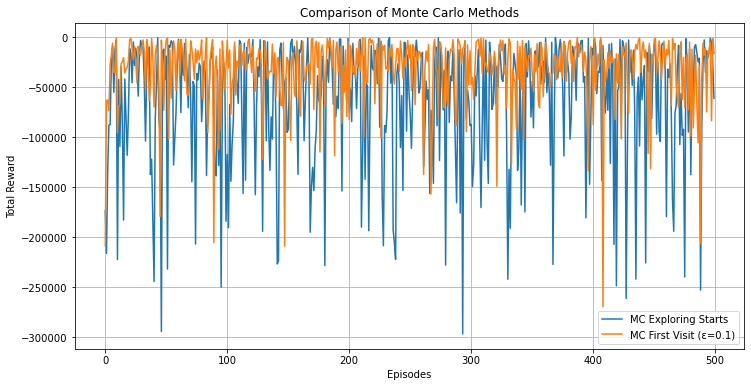

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(mc_es_rewards, label='MC Exploring Starts')
plt.plot(mc_first_visit_rewards, label='MC First Visit (ε=0.1)')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Comparison of Monte Carlo Methods')
plt.legend()
plt.grid()
plt.show()

In [9]:
optimal_actions_es = sum(np.argmax(Q_es[s]) == np.argmax(Q_first_visit[s]) for s in Q_es if s in Q_first_visit)
total_states = len(Q_es)

print(f'Policy Agreement: {optimal_actions_es}/{total_states} ({optimal_actions_es / total_states:.2%})')

Policy Agreement: 8/37 (21.62%)


##### Run Monte Carlo CliffWalking (is_slippery = False)

In [11]:
env = gym.make("CliffWalking-v0", is_slippery=False)

In [12]:
Q_es, mc_es_rewards = mc_es(env, n_episodes)
Q_first_visit, mc_first_visit_rewards = mc_first_visit(env, n_episodes)

In [13]:
env.close()

##### Plot graph and comparision

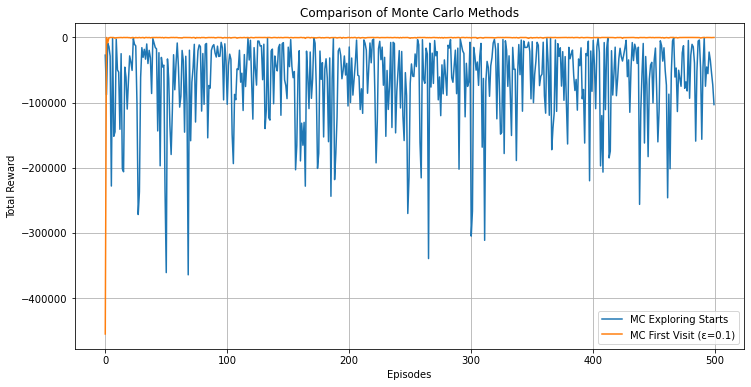

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(mc_es_rewards, label='MC Exploring Starts')
plt.plot(mc_first_visit_rewards, label='MC First Visit (ε=0.1)')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Comparison of Monte Carlo Methods')
plt.legend()
plt.grid()
plt.show()

In [15]:
optimal_actions_es = sum(np.argmax(Q_es[s]) == np.argmax(Q_first_visit[s]) for s in Q_es if s in Q_first_visit)
total_states = len(Q_es)

print(f'Policy Agreement: {optimal_actions_es}/{total_states} ({optimal_actions_es / total_states:.2%})')

Policy Agreement: 18/37 (48.65%)


##### Conclusion

In the Cliff Walking environment, when `is_slippery = True`, both algorithms struggle to learn an effective policy, resulting in suboptimal performance. However, when `is_slippery = False`, the On-policy First-Visit MC Control method significantly outperforms the Monte Carlo Exploring Starts approach. It quickly converges to the optimal or near-optimal path within just a few episodes, demonstrating more consistent and reliable learning.